2022-11-30 14:40:17.193 python[1208:49235] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


{'Name': 'Wayo', 'Birthday': '29-12-2020', 'Select': '', 'Measure Date': '30-11-2021', 'Select0': '', 'Weight': '5', 'Height': '55', 'myTable': [], '-CANVAS-': None}
{'Name': 'Wayo', 'Birthday': '29-12-2020', 'Select': '', 'Measure Date': '29-11-2022', 'Select0': '', 'Weight': '8', 'Height': '88', 'myTable': [], '-CANVAS-': None}
{'Name': 'Wayo', 'Birthday': '29-12-2020', 'Select': '', 'Measure Date': '30-11-2022', 'Select0': '', 'Weight': '8', 'Height': '78', 'myTable': [], '-CANVAS-': None}
{'Name': 'Wayo', 'Birthday': '29-12-2020', 'Select': '', 'Measure Date': '', 'Select0': '', 'Weight': '', 'Height': '', 'myTable': [1], '-CANVAS-': None}
{'Name': 'wayo', 'Birthday': '29-12-2020', 'Select': '', 'Measure Date': '13-09-2022', 'Select0': '', 'Weight': '5', 'Height': '67', 'myTable': [1], '-CANVAS-': None}
{'Name': '', 'Birthday': '', 'Select': '', 'Measure Date': '', 'Select0': '', 'Weight': '', 'Height': '', 'myTable': [1], '-CANVAS-': None}
{'Name': '', 'Birthday': '', 'Select': ''

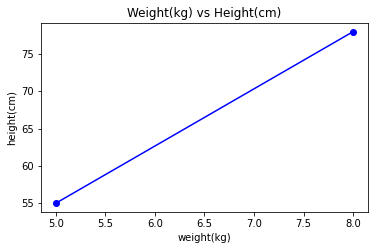

In [1]:
import json
import PySimpleGUI as sg
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
td=[]
Headings=['Name','Birthday','Measure Date','Weight','Height','Age(year)']

layout=[[sg.Text(Headings[0], size=(10,1)),sg.Input(key=Headings[0])],
        [sg.Text(Headings[1], size=(10,1)),sg.Input(key=Headings[1]),
         sg.CalendarButton('Select', close_when_date_chosen=True,
                           target=Headings[1], format= "%d-%m-%Y", 
                           no_titlebar=False)],
        [sg.Text(Headings[2], size=(10,1)),sg.Input(key=Headings[2]),
         sg.CalendarButton('Select', close_when_date_chosen=True,
                           target=Headings[2], format= "%d-%m-%Y", 
                           no_titlebar=False)],
        [sg.Text(Headings[3], size=(10,1)), sg.Input(key=Headings[3])],
        [sg.Text(Headings[4], size=(10,1)), sg.Input(key=Headings[4])], 
        [sg.Button('Add Row'),sg.Button('Edit Row'),
            sg.Button('Save Edit', disabled=True),sg.Button('Delete Row'),sg.Exit()],
        [sg.Table(td,Headings,key='myTable')],
        [sg.Canvas(size=(250,250), key='-CANVAS-')]
       ]

window=sg.Window('Baby Growth Tracking',layout, finalize=True)

def cal_age(birth,test_date):
    d1 = datetime.strptime(birth, "%d-%m-%Y")
    d2 = datetime.strptime(test_date, "%d-%m-%Y")
    age = d2-d1
    age = age.days
    age = age/365
    return age

def update_plot(td):
    axes=fig.axes
    plt.cla()
    g_weight=[]
    g_height=[]
    for i in range(len(td)):
        g_weight.append(td[i][3])
        g_height.append(td[i][4])
    axes[0].plot(g_weight,g_height,'b-', marker='o')
    plt.title('Weight(kg) vs Height(cm)')
    plt.xlabel('weight(kg)')
    plt.ylabel('height(cm)')
    figure_canvas_agg.draw()
    figure_canvas_agg.get_tk_widget().pack(side='top',fill='both',expand=1)
    
fig=plt.figure(figsize=(25,25))
#fig.add_subplot(111).plot([],[])
plt.title('Weight(kg) vs Height(cm)')
plt.xlabel('weight(kg)')
plt.ylabel('height(cm)')
figure_canvas_agg=FigureCanvasTkAgg(fig, window['-CANVAS-'].TKCanvas)
figure_canvas_agg.draw()
figure_canvas_agg.get_tk_widget().pack(side='top',fill='both',expand=1)

while True:
    event,values= window.read()
    print(values)
    if event == 'Add Row':
        try:
            values[Headings[0]]=values[Headings[0]].lower()
            values[Headings[3]]=float(values[Headings[3]])
            values[Headings[4]]=float(values[Headings[4]])
            values[Headings[5]]=float('%.2f'%cal_age(values[Headings[1]],values[Headings[2]]))
        except:
            sg.Popup('Pleaes put information as format', keep_on_top=True)
        finally:
            td.append([values[Headings[0]],values[Headings[1]],values[Headings[2]],values[Headings[3]],values[Headings[4]],values[Headings[5]]])
            td.sort(key=lambda x: x[5])
            window['myTable'].update(values=td)
            for i in range(2,5):    # Loop thru to clear boxes
                window[Headings[i]].update(value='')

    if event == 'Edit Row':
        if values['myTable']==[]:
            sg.popup('No Row Selected')
        else:
            editRow=values['myTable'][0]
            sg.popup('Edit Selected Row')
            td[editRow][5]=0
            for i in range(5):  
                window[Headings[i]].update(value=td[editRow][i])
            window['Save Edit'].update(disabled=False)
    if event == 'Save Edit':
        try:
            new_age=cal_age(values[Headings[1]],values[Headings[2]])
            td[editRow]=[values[Headings[0]],values[Headings[1]],values[Headings[2]],float(values[Headings[3]]),float(values[Headings[4]]),float('%.2f'%new_age)]
        except:
            sg.Popup('Pleaes put information as format', keep_on_top=True)
        finally:
            td.sort(key=lambda x: x[5])
            window['myTable'].update(values=td)
            for i in range(5):    # Loop thru to clear boxes
                window[Headings[i]].update(value='')
            window['Save Edit'].update(disabled=True)

    if event == 'Delete Row':
        if values['myTable']==[]:
            sg.popup('No Row Selected')
        else:
            if sg.popup_ok_cancel('Can not undo Delete: Continue?') == 'OK':
                del td[values['myTable'][0]]    # Removes the selected row
                window['myTable'].update(values=td)
    
    update_plot(td)
    
    if event in (sg.WIN_CLOSED, 'Exit'):
        save_td=[]
        for i in range(len(td)):
            td_d = dict(zip(Headings,td[i]))
            save_td.append(td_d)
        with open("Baby_growth_tracking.json",'w') as f:
            json.dump(save_td,f)
        break

f.close()  
window.close()